# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [333]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#mac
# dfcolors = pd.read_csv("/Users/henripeters/Documents/Projetperso/Python100day/Advanced/Datascience/Lego/data/colors.csv")
# dfsets = pd.read_csv("/Users/henripeters/Documents/Projetperso/Python100day/Advanced/Datascience/Lego/data/sets.csv")
# dfthemes = pd.read_csv("/Users/henripeters/Documents/Projetperso/Python100day/Advanced/Datascience/Lego/data/themes.csv")
#windows
dfcolors = pd.read_csv("C:/Users/henri.peters/Documents/perso/Python100day/Advanced/Datascience/Lego/data/colors.csv")
dfsets = pd.read_csv("C:/Users/henri.peters/Documents/perso/Python100day/Advanced/Datascience/Lego/data/sets.csv")
dfthemes = pd.read_csv("C:/Users/henri.peters/Documents/perso/Python100day/Advanced/Datascience/Lego/data/themes.csv")

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [334]:
print(dfcolors.head())
print(dfcolors.groupby('name')['rgb'].sum())

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
name
Aqua               B3D7D1
Black              05131D
Blue               0055BF
Blue-Violet        6874CA
Bright Green       4B9F4A
                    ...  
Violet             4354A3
White              FFFFFF
Yellow             F2CD37
Yellowish Green    DFEEA5
[No Color]         05131D
Name: rgb, Length: 135, dtype: object


In [335]:
dfcolors['name'].nunique()

135

In [336]:
print(dfthemes.head())

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [337]:
(dfcolors['is_trans'] == 't').sum()

28

In [338]:
dfcolors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.


<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png ">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [339]:
print(dfsets.head())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


In [340]:
print(dfsets.tail())

           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [341]:
dfsets.sort_values(by='year', inplace=True)
print(dfsets[dfsets['year']==min(dfsets['year'])])

      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [342]:
print(dfsets[dfsets['year']==min(dfsets['year'])].shape[0])

5


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [343]:
dfsets.sort_values(by='num_parts', inplace=True,ascending=False)
print(dfsets.head())

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [344]:
countperyear = dfsets.groupby("year")['set_num'].count()

In [345]:

countperyear=pd.DataFrame(countperyear)
# Rename all columns

print(countperyear)



      set_num
year         
1949        5
1950        6
1953        4
1954       14
1955       28
...       ...
2017      786
2018      816
2019      840
2020      674
2021        3

[71 rows x 1 columns]


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

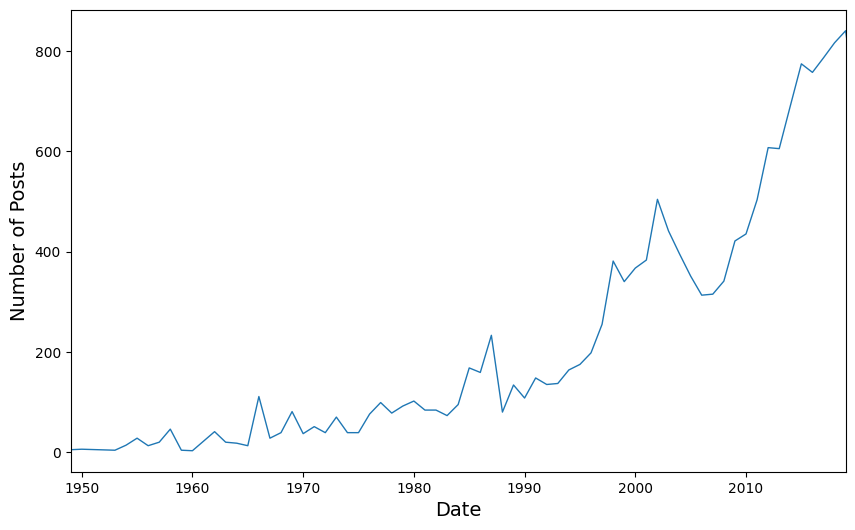

In [346]:
plt.figure(figsize=(10,6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xlim(xmin=countperyear.index[0], xmax=countperyear.index[-3])

plt.plot(countperyear.index, countperyear['set_num'], linewidth=1)



### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [347]:
dfthemes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [348]:
dfsets.groupby('year')['theme_id'].nunique()

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

In [349]:
countperyear=pd.DataFrame(dfsets.groupby('year')['theme_id'].nunique())

### Line Charts with Two Seperate Axes

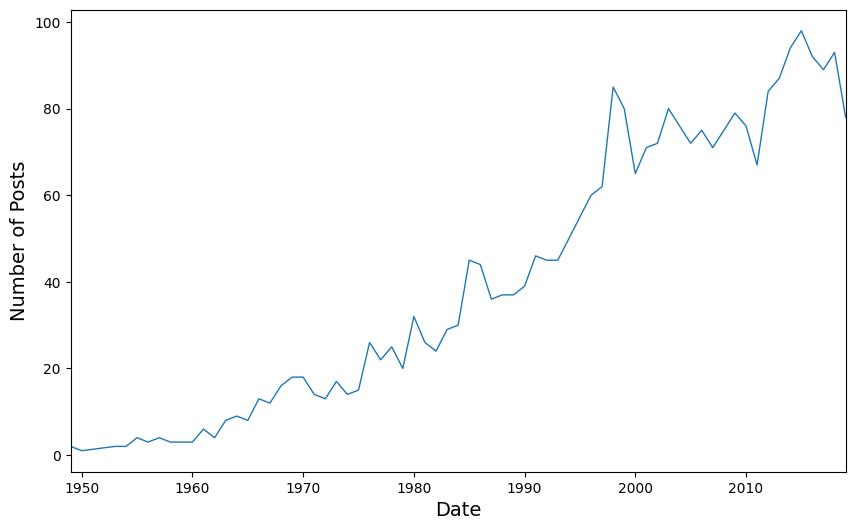

In [350]:
plt.figure(figsize=(10,6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xlim(xmin=countperyear.index[0], xmax=countperyear.index[-3])

plt.plot(countperyear.index, countperyear['theme_id'], linewidth=1)



**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [351]:
dfsets.groupby('year')['num_parts'].mean()

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
           ...    
2017    221.840967
2018    213.618873
2019    207.510714
2020    259.732938
2021      0.000000
Name: num_parts, Length: 71, dtype: float64

In [352]:
aggregated_data = dfsets.groupby('year').agg({'num_parts': ['sum', 'mean']})

aggregated_data = pd.DataFrame(aggregated_data)
print(aggregated_data)
aggregated_data.columns


     num_parts            
           sum        mean
year                      
1949       498   99.600000
1950         6    1.000000
1953        54   13.500000
1954       173   12.357143
1955      1025   36.607143
...        ...         ...
2017    174367  221.840967
2018    174313  213.618873
2019    174309  207.510714
2020    175060  259.732938
2021         0    0.000000

[71 rows x 2 columns]


MultiIndex([('num_parts',  'sum'),
            ('num_parts', 'mean')],
           )

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

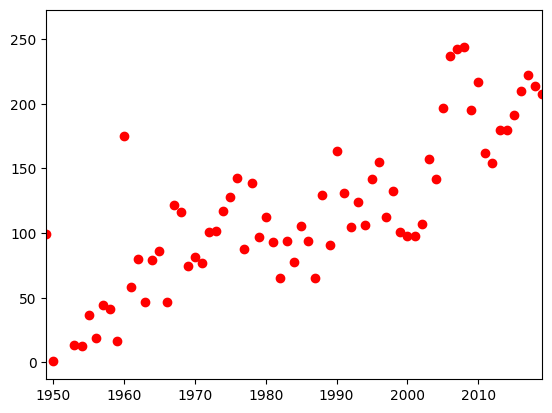

In [353]:
plt.xlim(xmin=countperyear.index[0], xmax=countperyear.index[-3])
plt.scatter(aggregated_data.index, aggregated_data[('num_parts', 'mean')], color='red')

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [354]:
print(dfsets.head())

print(dfsets.groupby('theme_id')['name'].count())



        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922
theme_id
1      167
2        4
3       18
4       39
5       12
      ... 
705      8
706     52
707      2
708     43
709      4
Name: name, Length: 571, dtype: int64


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [355]:
print(dfthemes.head())

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


In [359]:
dfthemes[dfthemes['name'].str.contains('Star Wars')]['theme_id'].values

array([ 18, 158, 209, 261], dtype=int64)

In [360]:
dfsets[dfsets['theme_id'].isin(dfthemes[dfthemes['name'].str.contains('Star Wars')]['theme_id'].values)]

,set_num,name,year,theme_id,num_parts
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462
11216,75222-1,Betrayal at Cloud City,2018,158,2810
11244,75244-1,Tantive IV,2019,158,1772
11256,75255-1,Yoda,2019,158,1771
11180,75190-1,First Order Star Destroyer,2017,158,1416
...,...,...,...,...,...
9117,66473-1,Star Wars Super Pack 3 in 1,2013,158,0
9113,66456-1,Star Wars Super Pack 3 in 1,2013,158,0
9085,66411-1,Super Pack 3 in 1,2012,158,0
9095,66431-1,"Star Wars Super Pack 3 in 1 (7914, 9488, 9491)",2012,158,0


### Merging (i.e., Combining) DataFrames based on a Key


In [356]:
dfthemes = dfthemes.rename(columns={'id': 'theme_id'})
print(dfthemes.head())
merged_df = pd.merge(dfsets, dfthemes, on='theme_id')
print(merged_df.head())

   theme_id            name  parent_id
0         1         Technic        NaN
1         2  Arctic Technic        1.0
2         3     Competition        1.0
3         4  Expert Builder        1.0
4         5           Model        1.0
    set_num                         name_x  year  theme_id  num_parts  \
0  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987   
1   70146-1     Flying Phoenix Fire Temple  2014       571       1300   
2   70010-1            The Lion CHI Temple  2013       571       1259   
3   70227-1          King Crominus' Rescue  2015       571        863   
4   70224-1         Tiger's Mobile Command  2015       571        712   

             name_y  parent_id  
0  Legends of Chima        NaN  
1  Legends of Chima        NaN  
2  Legends of Chima        NaN  
3  Legends of Chima        NaN  
4  Legends of Chima        NaN  
